<a href="https://www.kaggle.com/code/rodrigosalgado/nfl-big-dat-bowl-2025-project?scriptVersionId=216402502" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align: center;"> <h1 style="font-family: 'Arial', sans-serif; color: #3498db; text-shadow: 2px 2px #000000;">NFL Big Data Bowl 2025 Project</h1> <img src="https://tse4.mm.bing.net/th?id=OIG1.qT3q09mHB2.wpmF6xBln&pid=ImgGn" alt="NFL Big Data Bowl 2025" width="400" height="300"> </div>

## Description
The objective of this project is to determine which offensive formations tend to have more success gaining yards in different circumstances in the american football games. And determine which play can assure a higher percentage of yards gained. 

## Hypothesis
The hypothesis for this project is to analyze which play is the most effective in terms of yards gained and then know how much in percentage it is better to use this play for the offensive series.

In [1]:
#  Importing the basic libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from IPython.display import display, HTML
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'
import warnings
warnings.filterwarnings('ignore')

## Read the Document
For the analysis we will use the plays.csv document because it contains some variables we need to determine the most succesfull plays. 

In [2]:
plays = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/plays.csv')

In [3]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man


## Dataframe Formation
We filter the data with the necessary columns:
* offenseFormation: Formation used by possession team (text)
* passLength: The distance beyond the LOS that the ball traveled not including yards into the endzone.(numeric)
* yardsGained: Net yards gained by the offense, including penalty yardage (numeric)
* passResult: Dropback outcome of the play (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, R: Scramble, text)
* playAction: Boolean indicating whether there was play-action on the play (Boolean)
* dropbackType: The type of drop back after the snap by the QB (Traditional, Designed Rollout, Scramble, Scramble Rollout, Designed Rollout Left, Designed Rollout Right, Scramble Rollout Left, Scramble Rollout Right, Designed Run, QB Draw, Rollout, text)

In [4]:
df = plays[['offenseFormation', 'passLength','yardsGained', 'passResult','playAction', 'dropbackType']]
#Filter the rows with NaN values in offenseFormation and 'EMPTY' values
df = df[df['offenseFormation'].notnull() & (df['offenseFormation'] != '') & (df['offenseFormation'] != 'EMPTY')]
df.head(10)

,offenseFormation,passLength,yardsGained,passResult,playAction,dropbackType
2,SHOTGUN,-4.0,6,C,False,TRADITIONAL
3,SHOTGUN,-6.0,4,C,False,TRADITIONAL
4,PISTOL,NaN,-1,NaN,True,DESIGNED_RUN
5,SINGLEBACK,NaN,3,NaN,False,NaN
6,SHOTGUN,NaN,5,NaN,False,NaN
8,SHOTGUN,-6.0,0,I,False,TRADITIONAL
9,SHOTGUN,15.0,15,C,False,TRADITIONAL
10,SHOTGUN,5.0,0,I,False,TRADITIONAL
11,SHOTGUN,NaN,0,NaN,False,NaN
13,SHOTGUN,12.0,12,C,False,TRADITIONAL


In [5]:
# Group by 'offenseFormation' and calculate descriptive statistics from 'yardsGained'
formation_stats = df.groupby('offenseFormation')['yardsGained'].describe() 
print(formation_stats)

                   count      mean       std   min  25%  50%  75%   max
offenseFormation                                                       
I_FORM            1035.0  4.997101  7.802630 -20.0  1.0  3.0  7.0  75.0
JUMBO              125.0  2.328000  4.238411  -8.0  0.0  1.0  3.0  19.0
PISTOL             641.0  5.043682  7.799717 -12.0  0.0  3.0  7.0  57.0
SHOTGUN           8791.0  5.734729  9.050832 -68.0  0.0  4.0  9.0  98.0
SINGLEBACK        3915.0  5.353768  8.778269 -59.0  0.0  3.0  7.0  75.0
WILDCAT             87.0  4.643678  7.458376  -5.0  1.0  3.0  7.0  41.0


## Offense Formation Description
In the previous table we can see the count of plays, the average yards gained, the standard deviation of each formation, maximum and minimum values ​​and their quartiles. We can see that the three formations that have a higher average of yards gained are Shotgun, Singleback and Pistol. However, the standard deviation of the Shotgun formation is the highest, indicating that the amount of variation in the data is greater (9.05). This may indicate a lack of consistency in the data, but having plays ranging from 68 yards lost to 98 yards gained explains why there is more deviation.

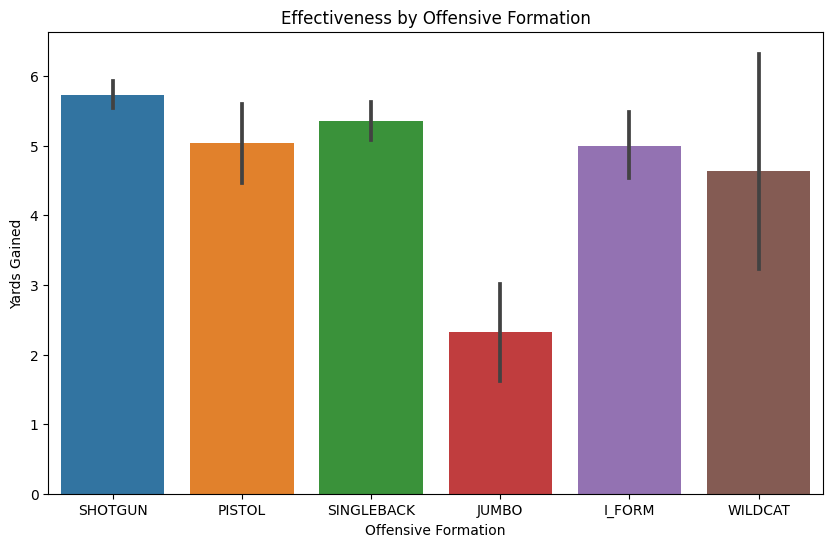

In [6]:
# View effectiveness by training
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='offenseFormation', y='yardsGained')
plt.title('Effectiveness by Offensive Formation')
plt.xlabel('Offensive Formation')
plt.ylabel('Yards Gained')
plt.show()

## Effectiveness by Offensive Formation
Each bar represents the effectiveness in terms of yards gained for each offensive formation, and the vertical lines above each bar represent the confidence intervals or margins of error. The "SHOTGUN" formation appears to be the most effective with approximately 5.8 yards gained, while the "JUMBO" formation is the least effective with approximately 2.5 yards gained.

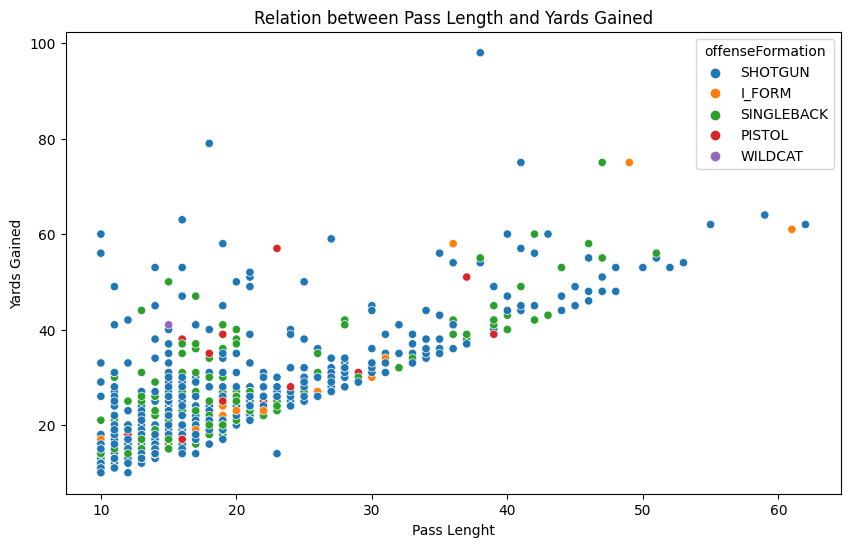

In [7]:
# Relation between 'passLength' and 'yardsGained'
# Filter data where 'yardsGained' and 'passLength' are greater than or equal to 10 yards
df_filter = df[(df['yardsGained'] >= 10) & (df['passLength'] >= 10)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filter, x='passLength', y='yardsGained', hue='offenseFormation')
plt.title('Relation between Pass Length and Yards Gained')
plt.xlabel('Pass Lenght')
plt.ylabel('Yards Gained')
plt.show()

## Relation between Pass Length and Yards Gained
This graph is useful for analyzing the effectiveness of different offensive formations and passing strategies. It can help identify which formations and pass lengths are most successful in terms of yards gained. We can see that Shotgun and Singleback formations have a higher number of plays that end with 10 yards gained or more, which is usually what is needed to continue advancing in the offensive series.

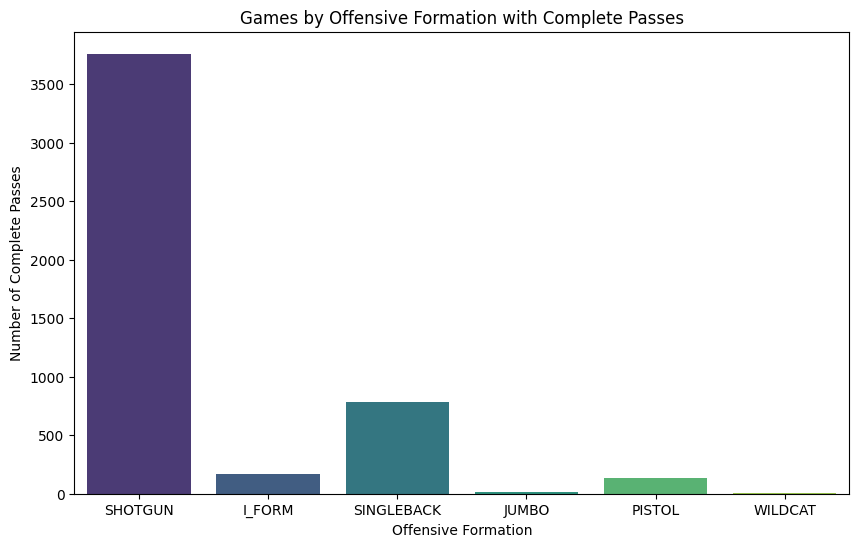

In [8]:
# Filter plays that ended with completed passes (passResult = "C")
df_complete = df[df['passResult'] == 'C']

# Create countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_complete, x='offenseFormation', palette='viridis')
plt.title('Games by Offensive Formation with Complete Passes')
plt.xlabel('Offensive Formation')
plt.ylabel('Number of Complete Passes')
plt.show()

## Games by Offensive Formation with Complete Passes
This graph is useful for analyzing the effectiveness of each formation with the completed passes. The I_FORM, JUMBO, PISTOL and WILDCAT formations have a much lower number of completed passes compared to SHOTGUN and SINGLEBACK. This suggests that the SHOTGUN formation is the most effective or the most used to complete passes in the games analyzed. 
Although it would be good to consider doing a more even test between formation types since in the data we found a disproportionate number of plays with the shotgun formation. Maybe do a 100-play drill with each formation to get more reliable data.

              count      mean        std   min  25%  50%   75%   max
playAction                                                          
False       11860.0  5.161889   8.321443 -68.0  0.0  3.0   8.0  98.0
True         2734.0  7.042429  10.543050 -34.0  0.0  4.0  12.0  79.0


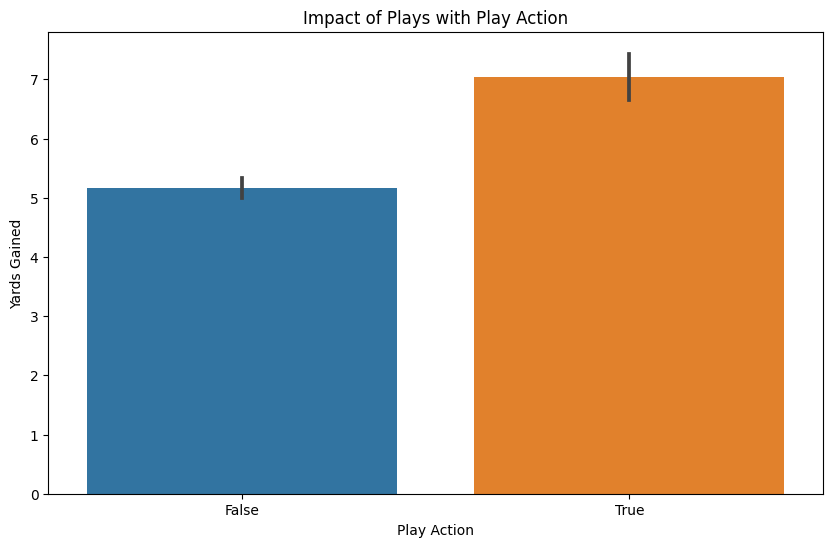

In [9]:
# Group by 'playAction' and calculate descriptive statistics of 'yardsGained'
play_action_stats = df.groupby('playAction')['yardsGained'].describe()
print(play_action_stats)

# Visualize the impact of each play with play action
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='playAction', y='yardsGained')
plt.title('Impact of Plays with Play Action')
plt.xlabel('Play Action')
plt.ylabel('Yards Gained')
plt.show()


## Impact of Plays with Play Action

From the graph it can be inferred that plays with pass action (True) tend to gain more yards on average (7.04) compared to plays without pass action (False) which have an average of 5.16 yards gained. This suggests that pass-action plays may be more effective in terms of yards gained. Although the count of plays with play action is much lower than that of plays without play action, so I would suggest carrying out a test with the same number of counts to obtain data with greater reliability.

                         count      mean        std   min  25%  50%    75%  \
dropbackType                                                                 
DESIGNED_ROLLOUT_LEFT    185.0  5.589189   7.542913 -12.0  0.0  4.0   9.00   
DESIGNED_ROLLOUT_RIGHT   367.0  5.880109   8.883079 -12.0  0.0  3.0   9.00   
DESIGNED_RUN             268.0  5.496269   8.373982 -12.0  1.0  4.0   7.00   
QB_SNEAK                 110.0  2.118182   2.474575   0.0  1.0  2.0   3.00   
SCRAMBLE                 738.0  5.775068   9.094160 -20.0  0.0  3.0   9.00   
SCRAMBLE_ROLLOUT_LEFT     34.0  3.764706   6.596872 -10.0  0.0  2.0   7.75   
SCRAMBLE_ROLLOUT_RIGHT   124.0  3.758065   6.626347 -12.0  0.0  2.0   6.00   
TRADITIONAL             7002.0  6.424593  10.219269 -68.0  0.0  4.0  10.00   

                         max  
dropbackType                  
DESIGNED_ROLLOUT_LEFT   37.0  
DESIGNED_ROLLOUT_RIGHT  55.0  
DESIGNED_RUN            60.0  
QB_SNEAK                25.0  
SCRAMBLE                62.0  
SC

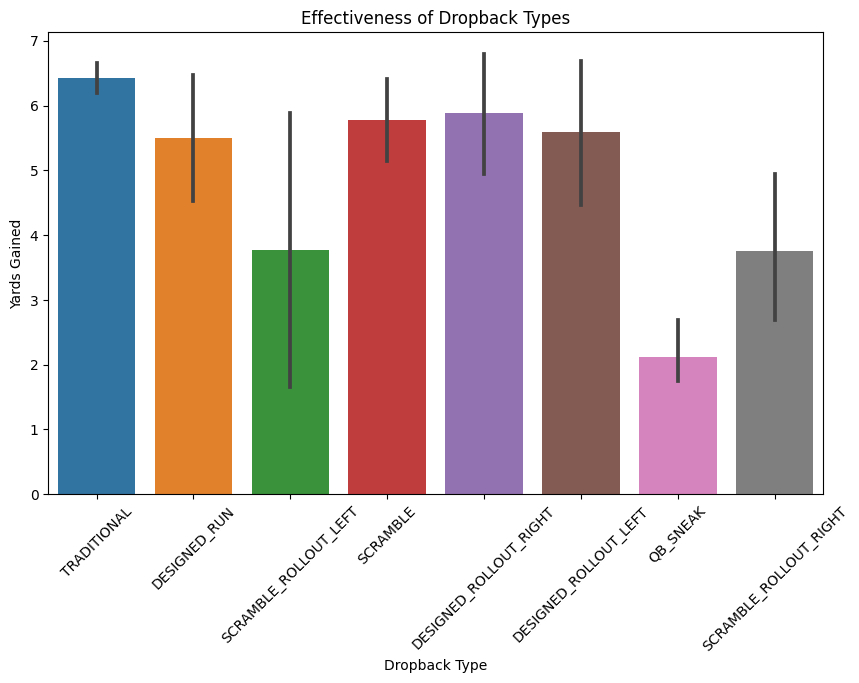

In [10]:
#Filter the Unknown dropback type from the data
df_filtered = df[df['dropbackType'].notnull() & (df['dropbackType'] != '') & (df['dropbackType'] != 'UNKNOWN')]
# Group by 'dropbackType' and calculate descriptive statistics of 'yardsGained'
dropback_stats = df_filtered.groupby('dropbackType')['yardsGained'].describe()
print(dropback_stats)

# Visualize types of dropback
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtered, x='dropbackType', y='yardsGained')
plt.title('Effectiveness of Dropback Types')
plt.xlabel('Dropback Type')
plt.ylabel('Yards Gained')
plt.xticks(rotation=45)
plt.show()


## Effectiveness of Dropback Types

The graph shows the effectiveness of different types of dropbacks in terms of yards gained. The types of "dropback". The TRADITIONAL type of dropback is the most effective, averaging over 6 yards gained. And it has little variability. The dropback types DESIGNED_RUN, SCRAMBLE, DESIGNED_ROLLOUT_RIGHT, and DESIGNED_ROLLOUT_LEFT are similarly effective, averaging around 5 yards gained. But the variability of these "dropbacks" is greater. The graph is interesting and relevant because it allows us to compare the effectiveness of different dropback strategies in American football, which can be useful for coaches and players when planning plays.

## Conclusions

By doing the relevant analysis to test our hypothesis, we know that the SHOTGUN formation is the one that guarantees the most yards, that plays with play action usually give more yards than plays without play action and that the traditional dropback is the most effective. Which means that a play with a SHOTGUN formation, with play action and traditional dropback is the most effective play to gain yards.

To analyze the effectiveness of running a shotgun formation with play action compared to a one without play action, we first need the yardage gained data for both plays. From the graphs shown, we have the following information:

* Plays without play action (False): average of approximately 5 yards gained.
* Play action plays (True): average of approximately 7 yards gained.

The average for plays without play action is 5 yards, in the next code I make the percentage calculation of the effectiveness of the shotgun formation with play action compared to the traditional dropback:
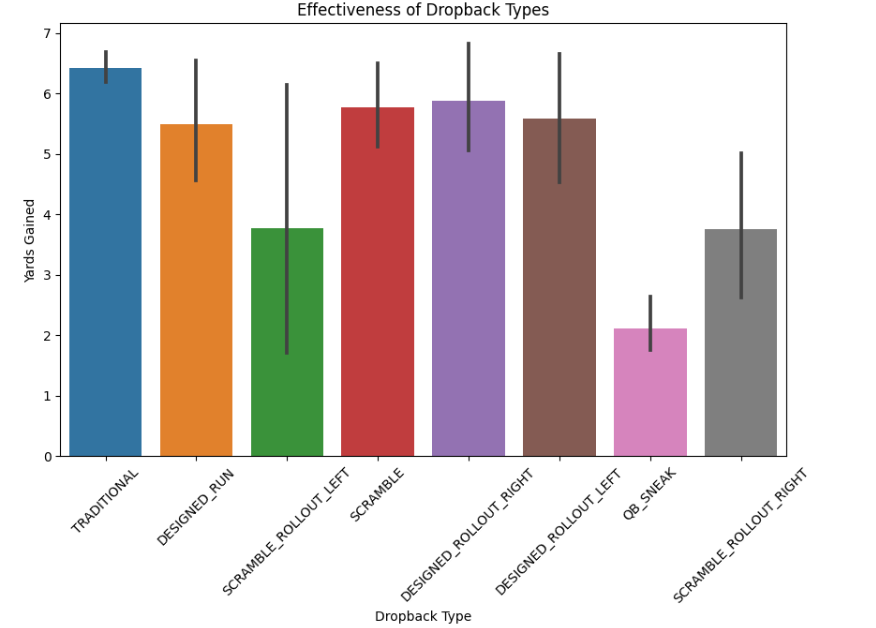

In [11]:
# Shotgun effectiveness with play action
yards_play_action = 7

# Shotgun effectiveness without play action
yards_no_play_action = 5

# Calculate the pecentage of effectiveness
efec_rel = ((yards_play_action - yards_no_play_action) / yards_play_action) * 100

print(f"The shotgun formation with play action is a {efec_rel:.2f}% more effective than one without play action.")

The shotgun formation with play action is a 28.57% more effective than one without play action.


Relative Effectiveness Calculation
Using these averages, we will calculate the percentage of additional effectiveness of a shotgun formation with play action compared to a normal play.

First, we subtract the average yards gained from a shotgun formation with play action and traditional dropback then divide by the average yards gained from a singleback play. Then, we multiply by 100 to get the percentage.

In [12]:
# Effectiveness of Shotgun formation with play action and traditional dropback
yards_play_action_shotgun = 7

# Effectiveness of singleback play
yards_singleback = 5.5

# Calculate pecentage of effectiveness
efec_relative = ((yards_play_action_shotgun - yards_singleback) / yards_singleback) * 100

print(f"The shotgun formation with play action and traditional dropback is a {efec_relative:.2f}% more effective than a singleback play.")


The shotgun formation with play action and traditional dropback is a 27.27% more effective than a singleback play.
